<a href="https://colab.research.google.com/github/Georgia-MAX-holic/footprints/blob/main/PJ/game_sale/New/Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.6 MB/s eta 0:00:00


In [2]:

import pandas as pd 
from google.colab import drive

drive.mount('/content/drive')
filetitle = '/content/drive/My Drive/cpding/asdf/Game_data_EDA.csv'

df = pd.read_csv(filetitle)
     

Mounted at /content/drive


In [3]:
df_chart = df[["Name","Global_Sales"]]
df_chart.set_index("Name", inplace = True )
sales_max = df_chart.idxmax(axis=0 , skipna=True )
sales_max

Global_Sales    Wii Sports
dtype: object

가장 많이 팔린 제품 = 닌텐도 윌 스포츠 

In [4]:
df=  df.sort_values(by="Global_Sales" , ascending = False)

In [5]:
df.loc[[0,1,2,3,4,5,6]]

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Null,Critic_Score,Critic_Count,User_Score,User_Count,Unnamed: 17,Rating
0,0.0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,7.100168,76.0,51.0,8,322.0,NaN,E
1,NaN,NaN,PUBG,Series,2017.0,Shooter,PUBG Corporation,NaN,NaN,NaN,NaN,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.986230,NaN,NaN,NaN,NaN,NaN,NaN
3,448.0,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.986230,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,2017.0,Shooter,PUBG Corporation,NaN,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2.732611,82.0,73.0,8.3,709.0,NaN,E
6,4.0,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2.715577,80.0,73.0,8,192.0,NaN,E


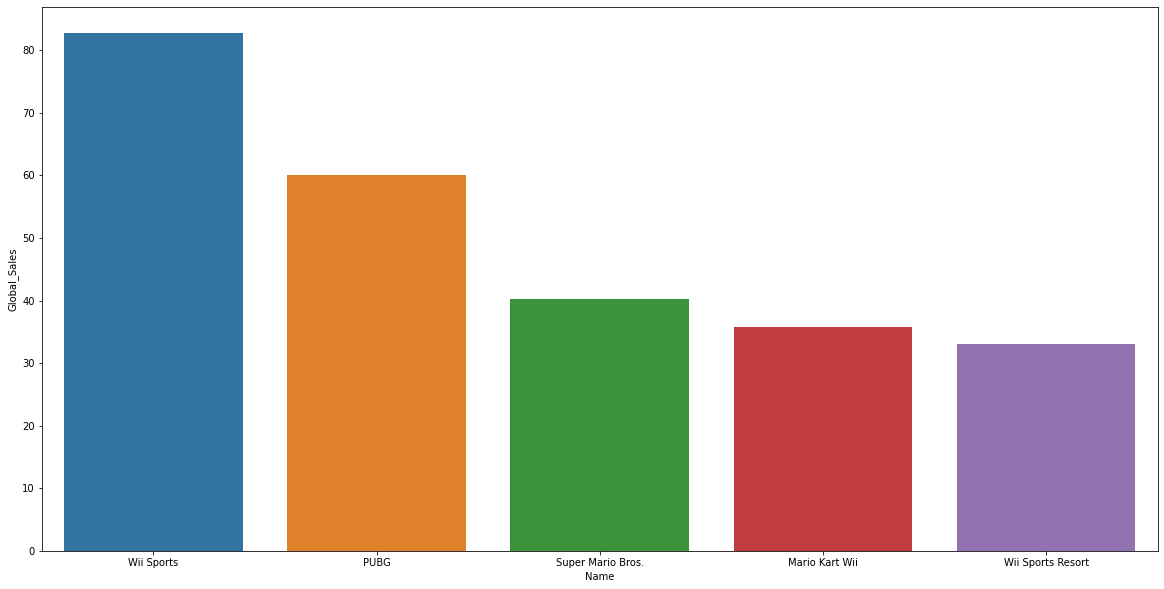

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

top5_visual=df.loc [[0,1,2,3,5,6]]
plt.figure(figsize=(20,10))
sns.barplot(x='Name', y='Global_Sales', data=top5_visual) 

In [7]:
df_Platform = df[["Platform","Global_Sales"]].dropna()
df_Genre =  df[["Genre", "Global_Sales"]]

In [8]:
df_Platform = df_Platform.groupby("Platform").sum()
df_Genre = df_Genre.groupby("Genre").sum()

In [9]:
df_Platform = df_Platform.sort_values(by="Global_Sales" , ascending=False).reset_index()
df_Genre = df_Genre.sort_values(by="Global_Sales", ascending=False).reset_index()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
release_date_sale =  df[["Year","Global_Sales"]].groupby('Year')['Global_Sales'].sum().reset_index()

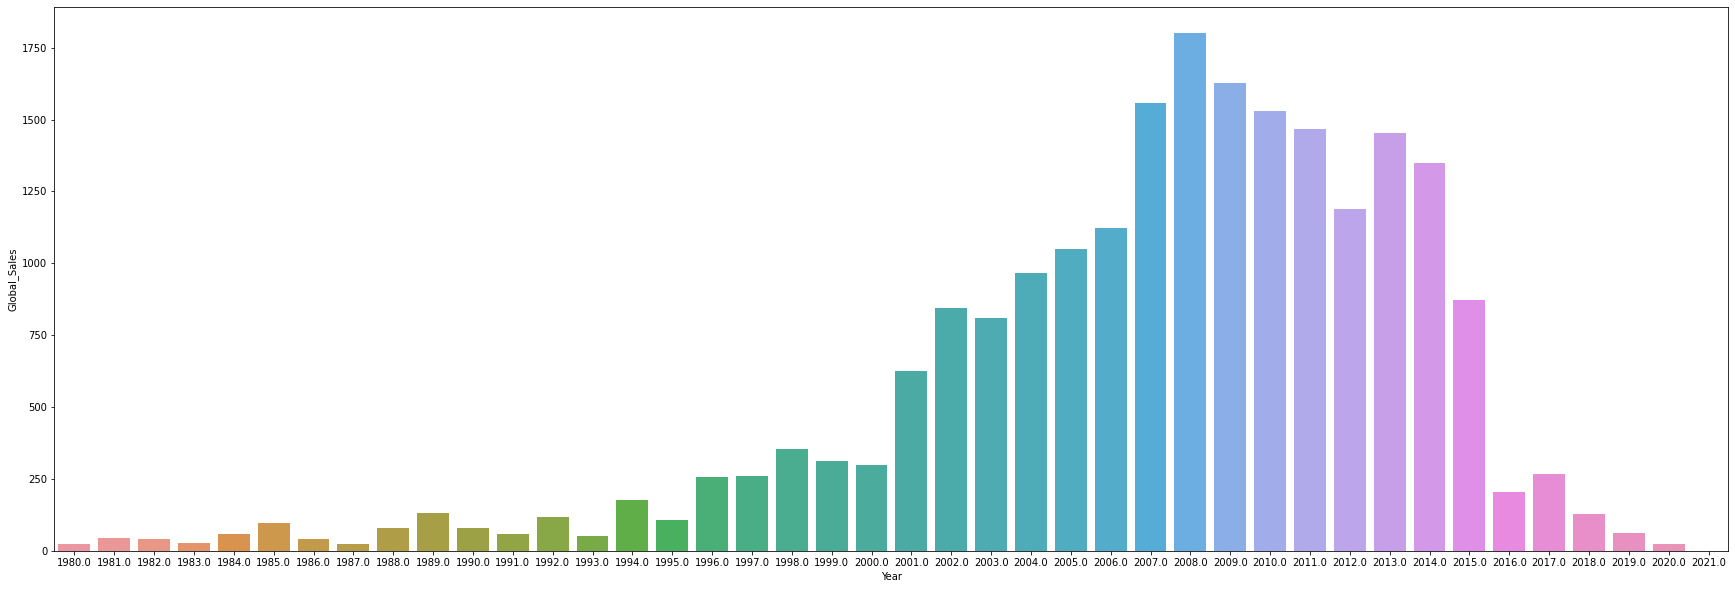

In [11]:
plt.figure(figsize=(30,10))
sns.barplot(x='Year', y='Global_Sales', data=release_date_sale) 

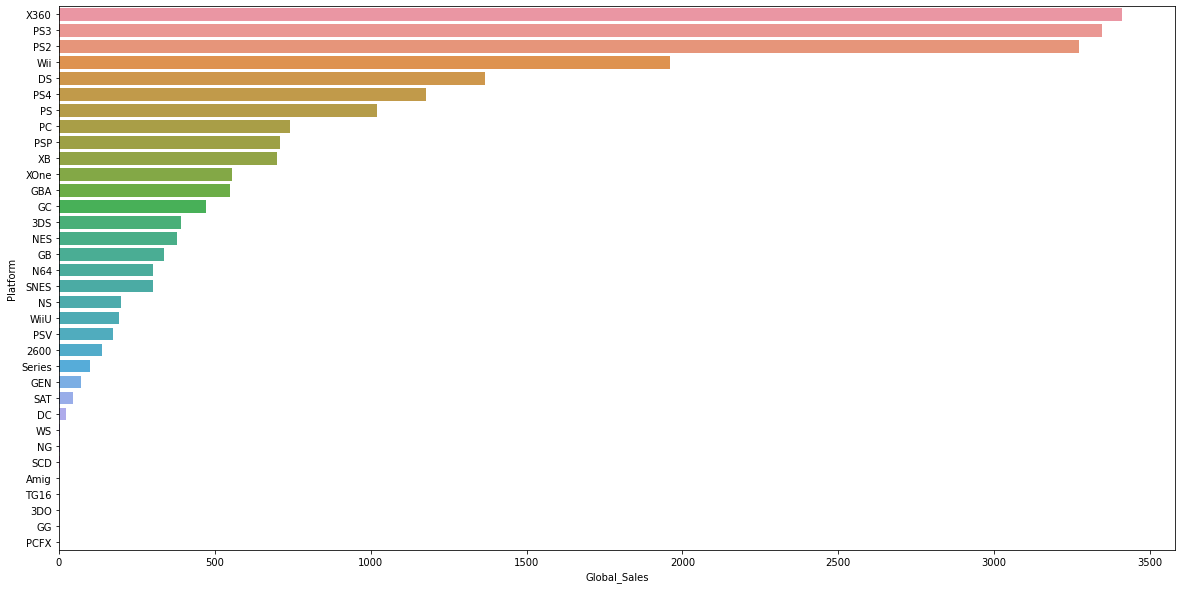

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(y='Platform', x='Global_Sales', data=df_Platform) 

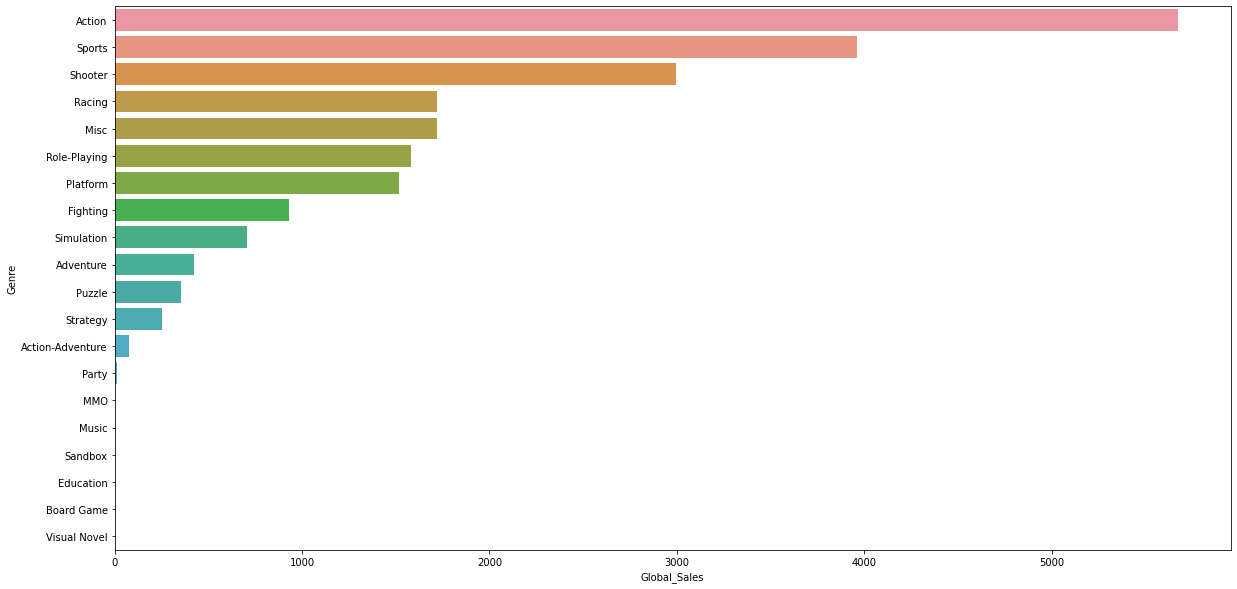

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(y='Genre', x='Global_Sales', data=df_Genre) 

In [14]:
use_df=df[["Name","Year","Platform","Genre","Publisher","NA_Sales","JP_Sales","EU_Sales","Other_Sales","Global_Sales"]].dropna()

In [15]:
import numpy as np
use_df["compare"]= np.nan

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(use_df[["NA_Sales","EU_Sales"]],use_df["JP_Sales"], test_size = 0.2, random_state = 2)
model =  LinearRegression()
model.fit(X_train, y_train)

LinearRegression()